# Task a) and b) of Project 1 - FYS-STK4155

In [110]:
from functions import *

%load_ext autoreload
%autoreload 2

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 10,
})

# For reproducibility
np.random.seed(2018)
seed = np.random.seed(2018)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# a) Ordinary Least Squares (OLS)
* Using OLS to predict the Runge function.
* Method is applied for the different number of data points in `n_vals` and for the different polynomial degrees in `p_vals`.
* Model performance assessed with MSE score and R^2 score.

In [111]:
n = 700  # samples
p_vals = np.arange(2, 16)  # polynomial degrees

In [112]:
df_OLS_degs = OLS_various_poly_deg(n, p_vals)  # Dataframe with results for n samples and range of poly degrees

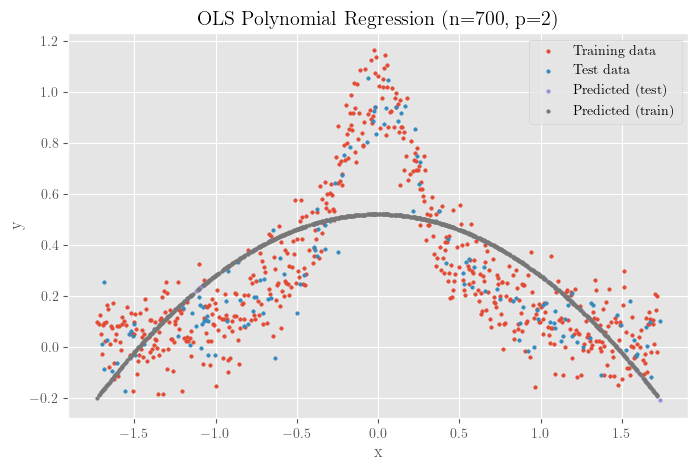

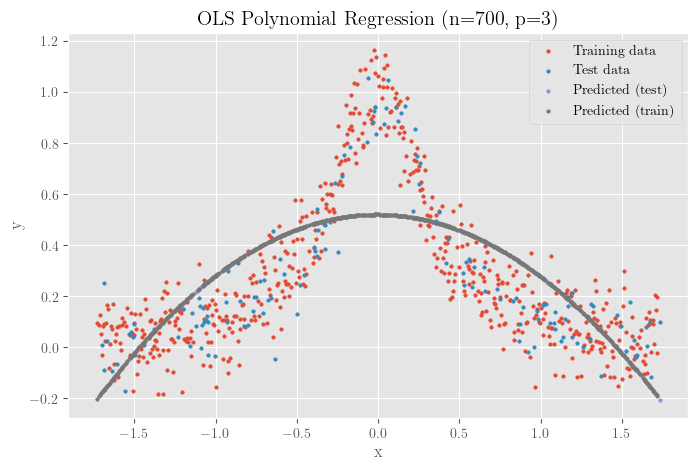

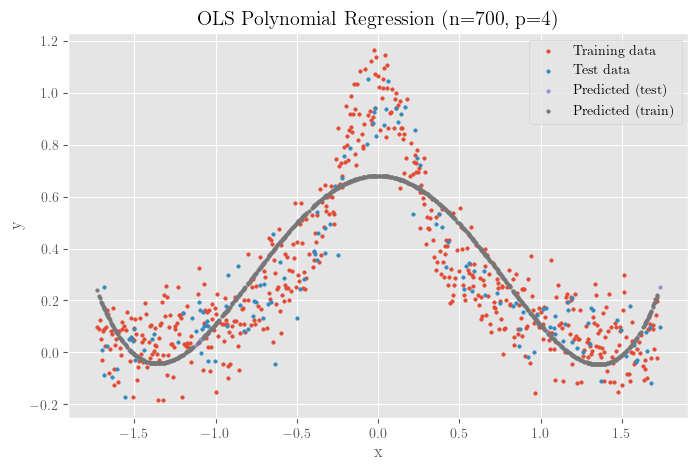

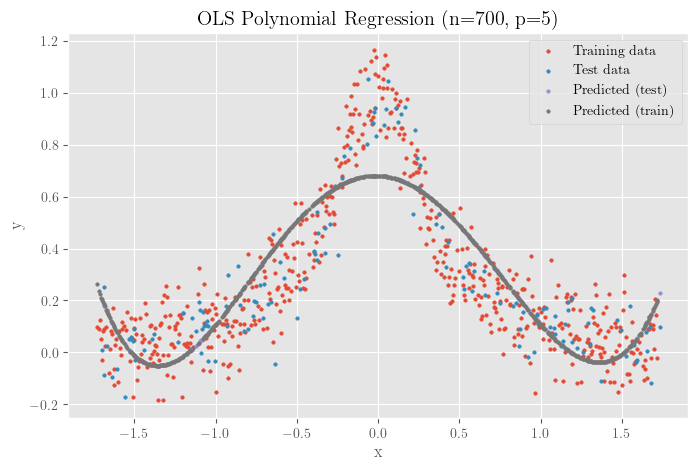

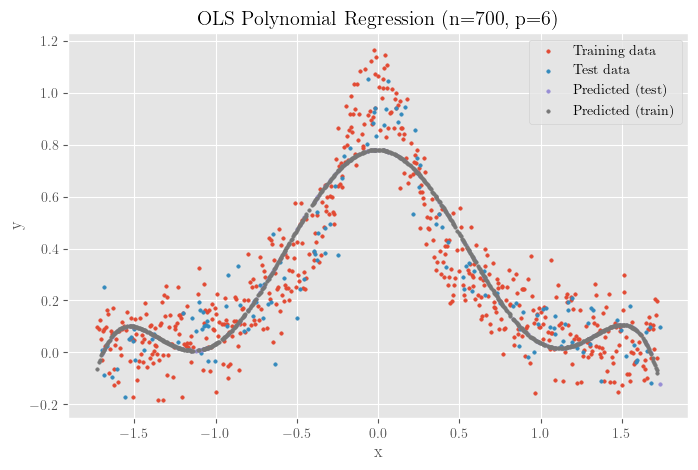

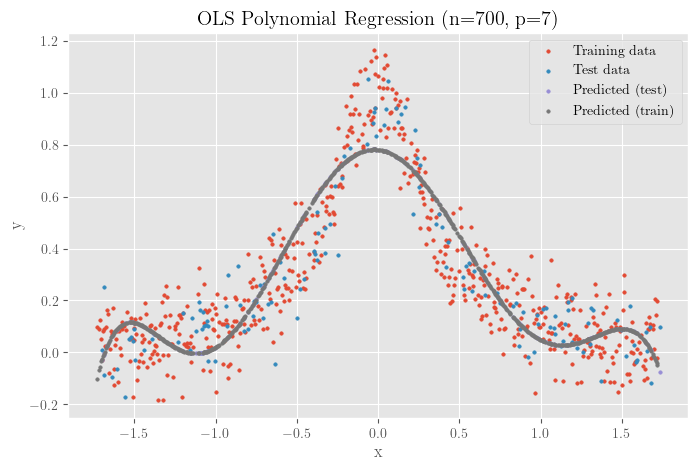

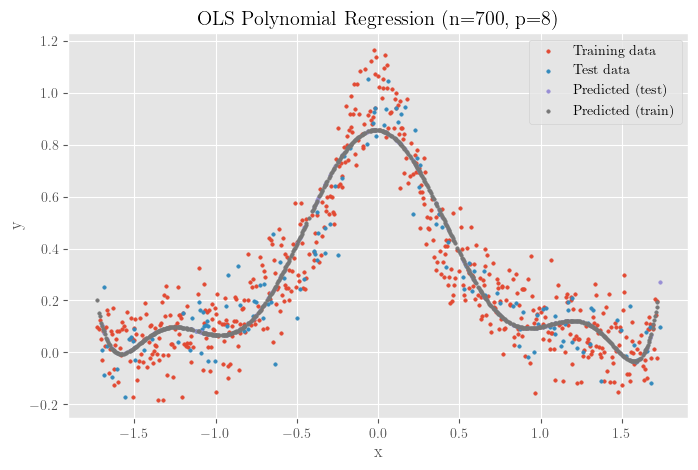

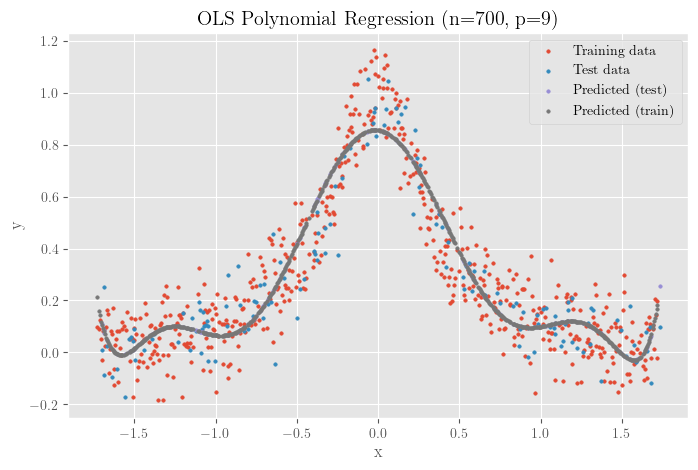

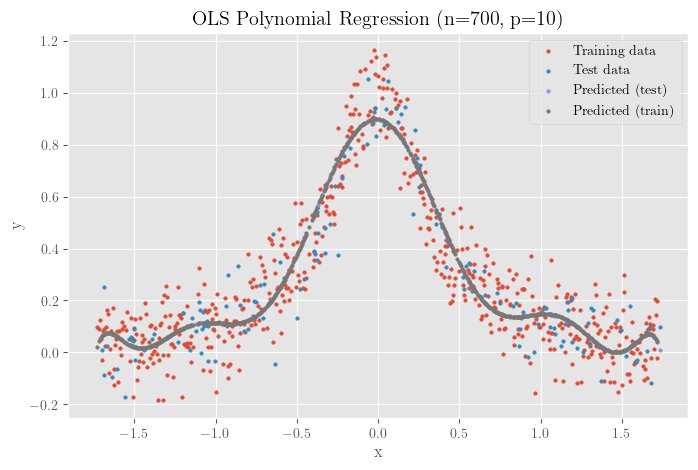

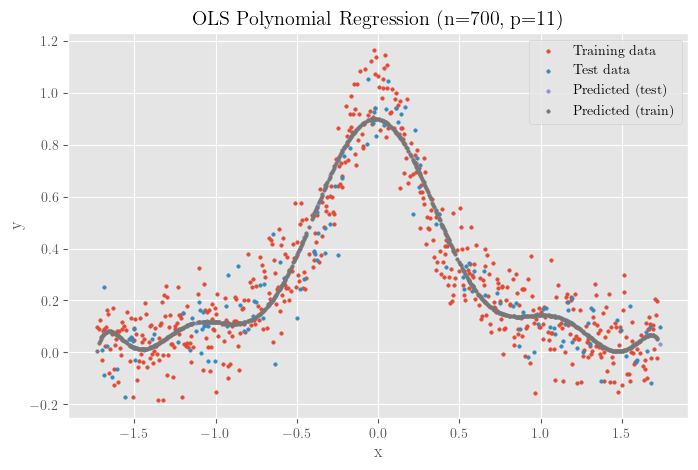

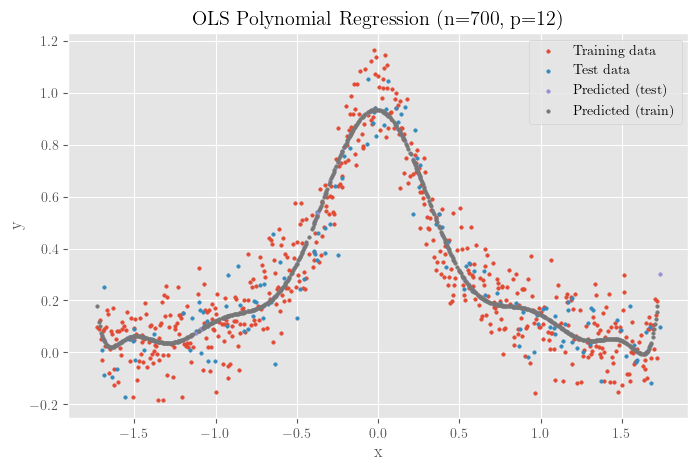

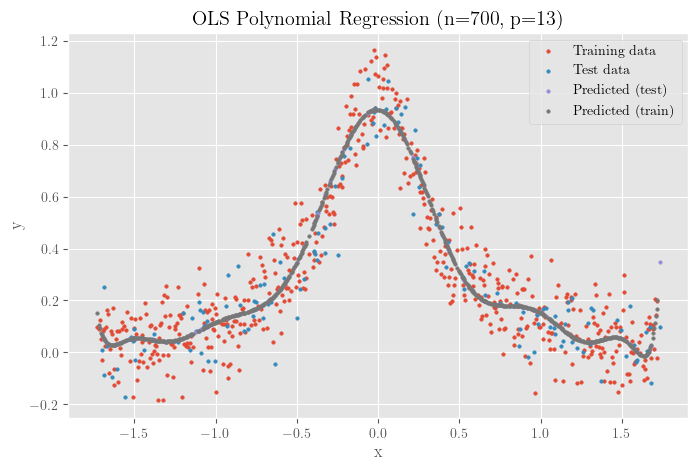

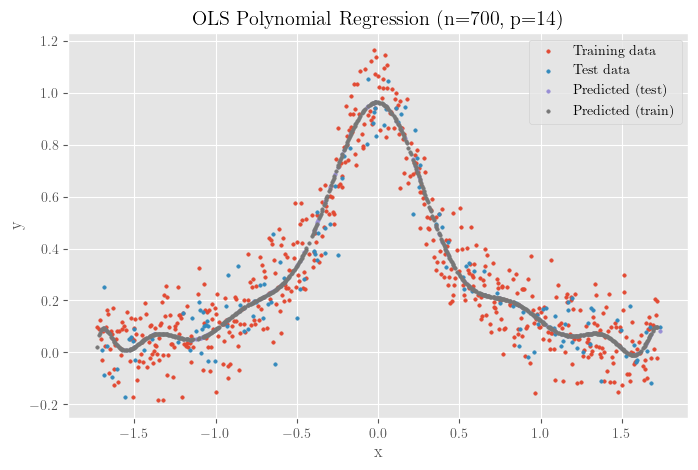

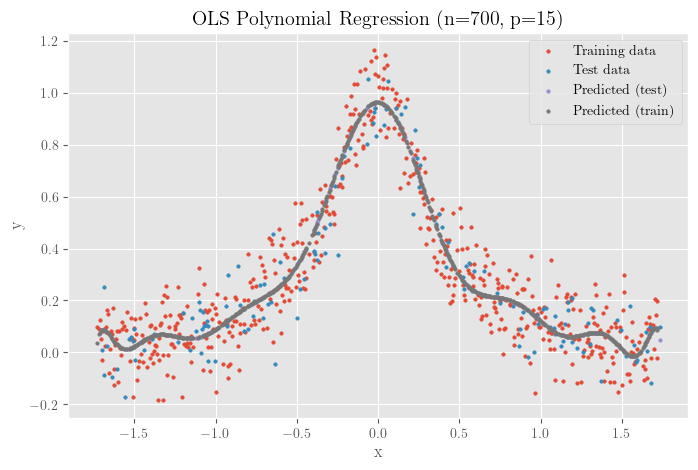

In [113]:
for p in p_vals:
    plot_OLS_results(df_OLS_degs, p, n)

Text(0.5, 0.98, 'OLS (n=700)')

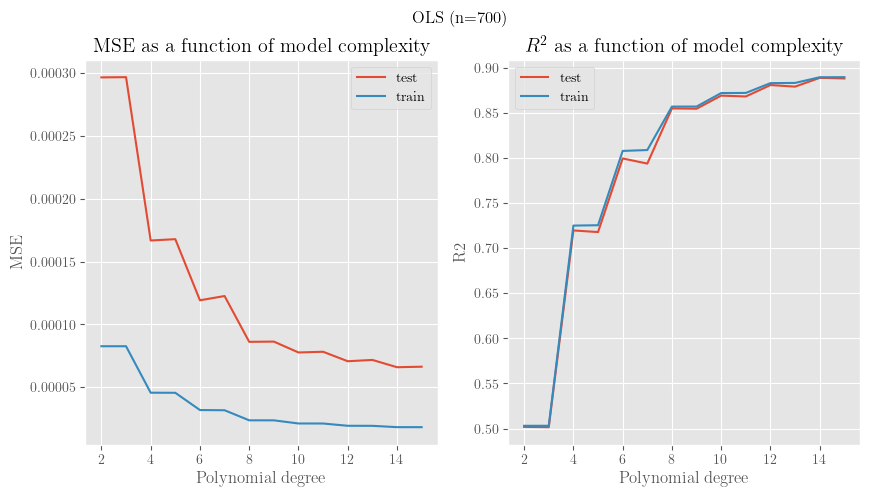

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_test'], label='test')
ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_train'], label='train')

ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_test'], label='test')
ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_train'], label='train')

ax[0].set_ylabel('MSE')
ax[1].set_ylabel('R2')

ax[0].set_title('MSE as a function of model complexity')
ax[1].set_title(r'$R^2$ as a function of model complexity')

for axs in ax:
    axs.legend()
    axs.set_xlabel('Polynomial degree')

fig.suptitle(f'OLS (n={n})')

For OLS, the best model is found with polynomial degree 14, when evaluating MSE/R^2 for 700 data points.

In [115]:
p = 14  # Polynomial degree
n_vals = np.arange(10, 2000, 100)  # samples

In [116]:
df_OLS_points = OLS_various_n_data(p, n_vals)  # Dataframe with results for one poly degree and for different number of samples

Text(0, 0.5, '$R^2$')

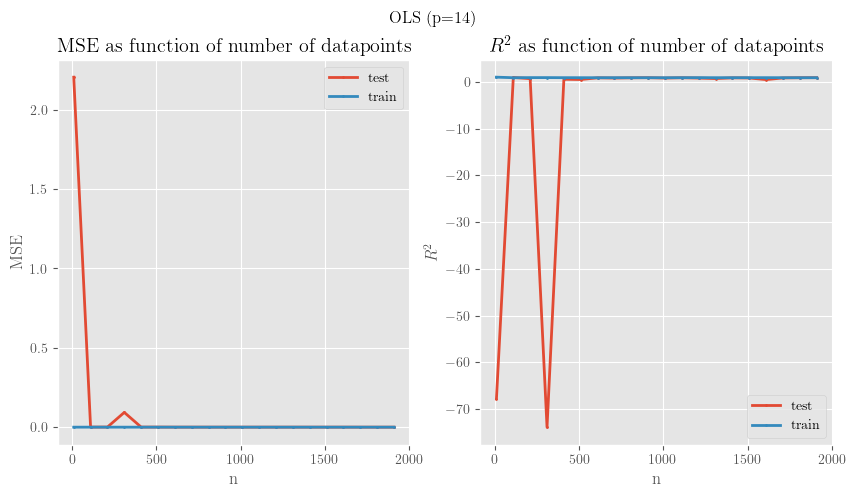

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(df_OLS_points['n'], df_OLS_points['MSE_test'], marker='o', markersize='1', linewidth='2', label='test')
ax[0].plot(df_OLS_points['n'], df_OLS_points['MSE_train'], marker='o', markersize='1', linewidth='2', label='train')

ax[1].plot(df_OLS_points['n'], df_OLS_points['R2_test'], marker='o', markersize='1', linewidth='2', label='test')
ax[1].plot(df_OLS_points['n'], df_OLS_points['R2_train'], marker='o', markersize='1', linewidth='2', label='train')

ax[0].set_title('MSE as function of number of datapoints ')
ax[1].set_title(r'$R^2$ as function of number of datapoints')

fig.suptitle(f'OLS (p={p})')

for axs in ax:
    axs.set_xlabel('n')
    axs.legend()

ax[0].set_ylabel('MSE')
ax[1].set_ylabel(r'$R^2$')

We see that number of data points is important for the performance of OLS. Here, with $p=14$, $n>500$ seems to be a sufficient number of samples.

# b) Ridge regression
* Using Ridge regression to predict the Runge function.
* Method is applied for different polynomial degrees (`p_vals`), and for different values of the penalization parameter $\lambda$.
* Assessing model perfomance with MSE and R^2.

In [118]:
n = 700  # samples
lamb = 0.1  # regularization term
p_vals = np.arange(2, 16)  # range of polynomial degrees

In [119]:
df_Ridge_degs = Ridge_various_poly_deg(n, lamb, p_vals)  # dataframe w results

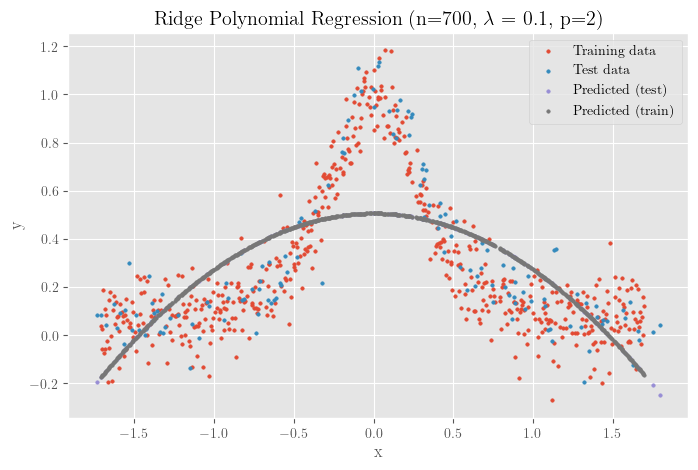

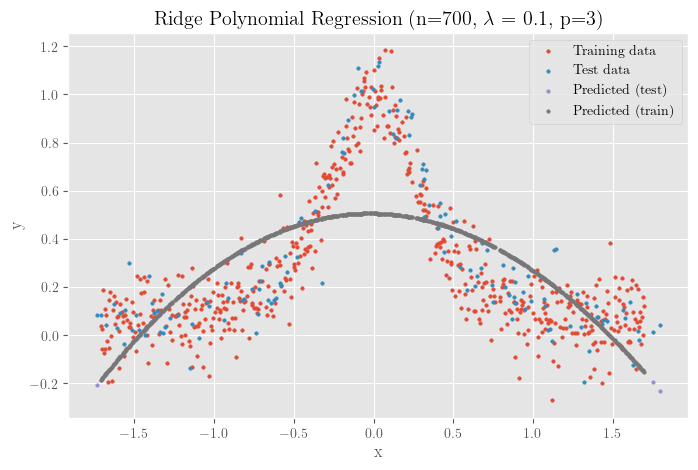

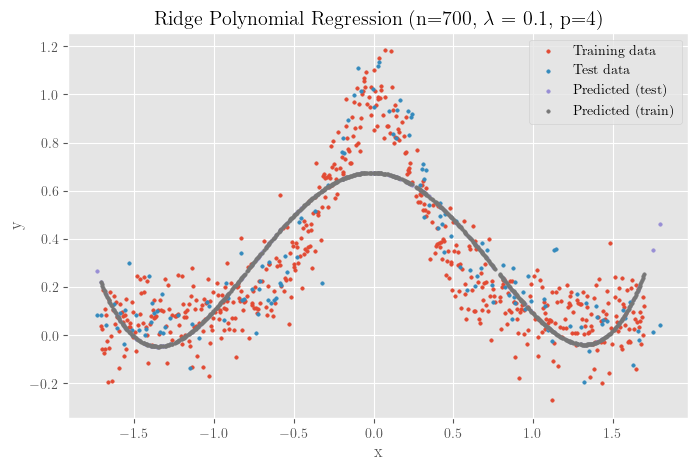

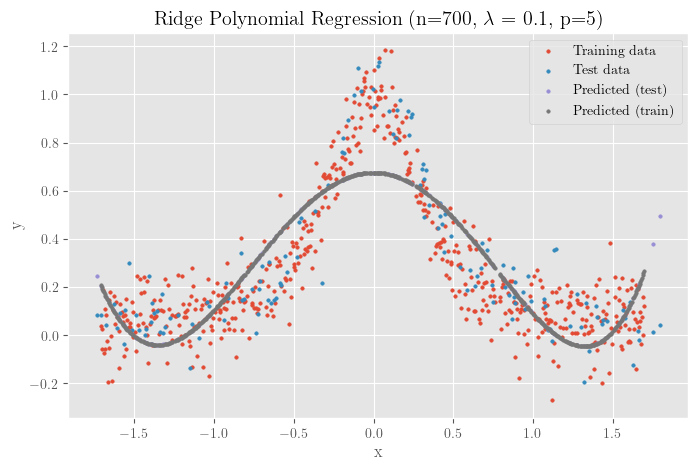

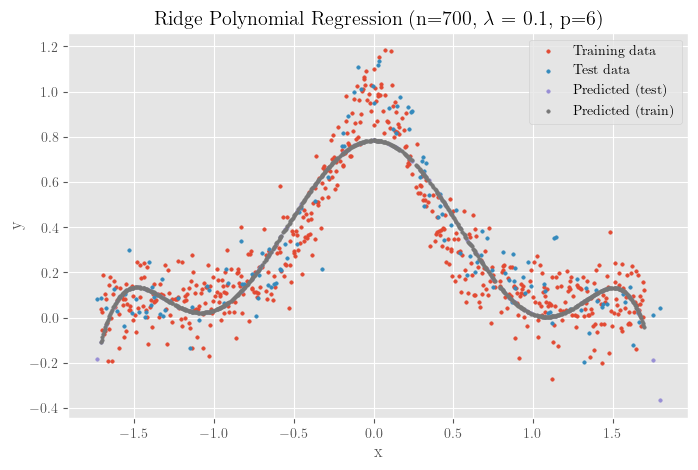

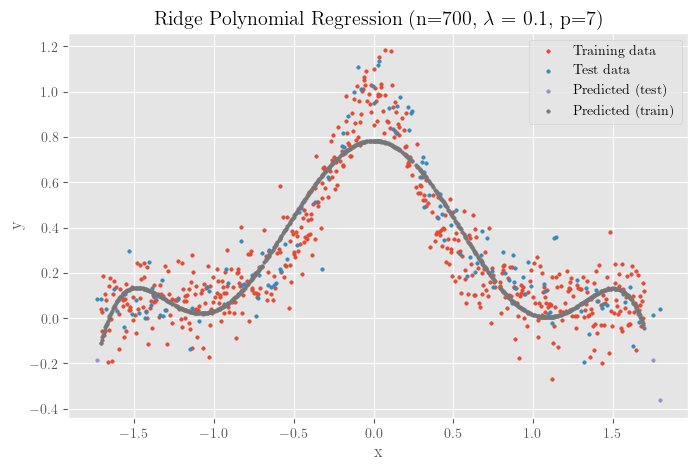

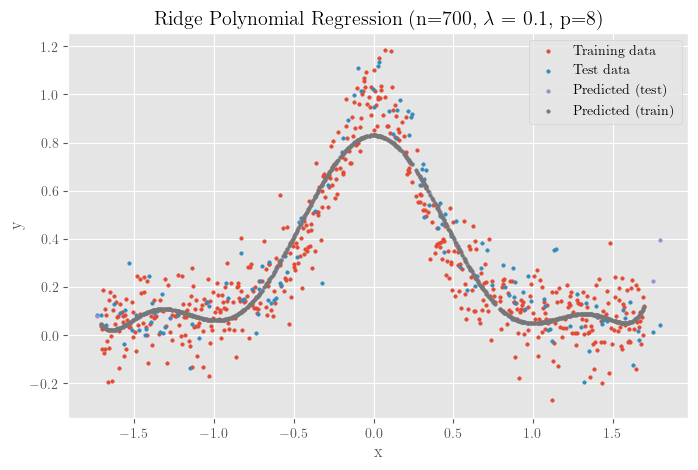

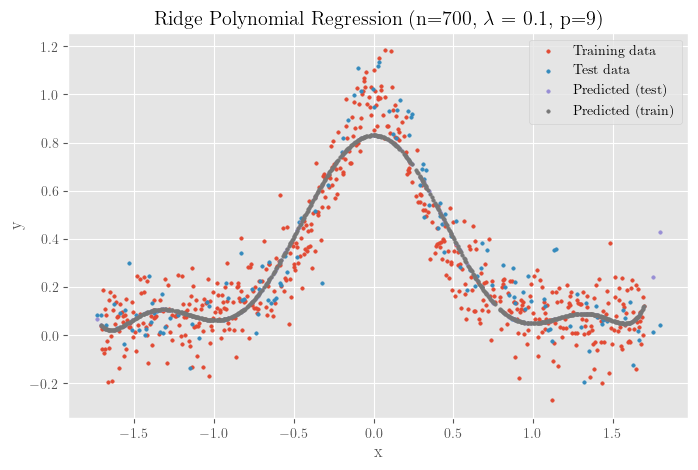

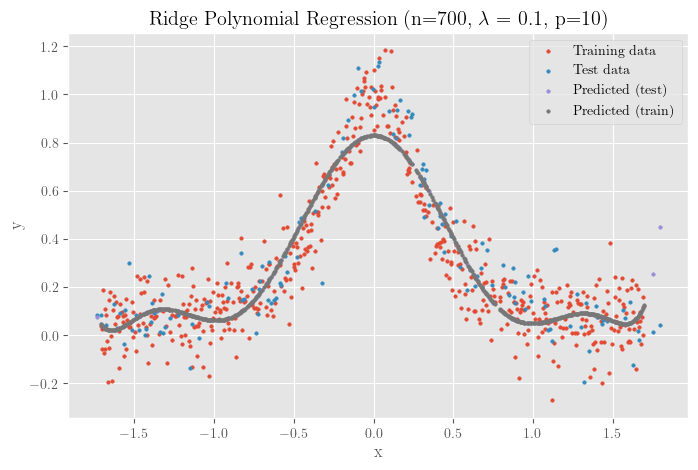

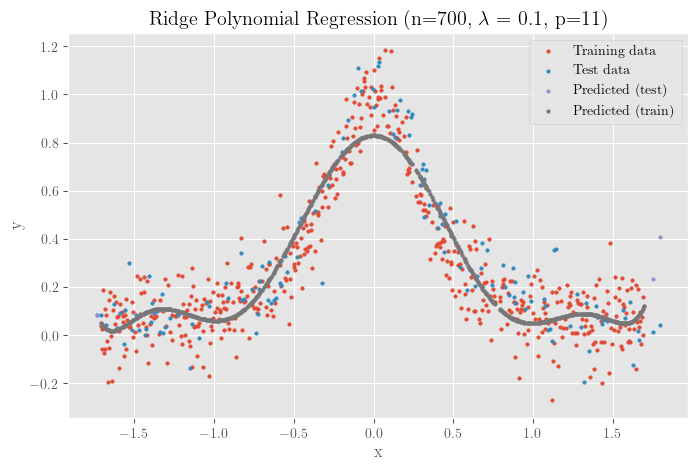

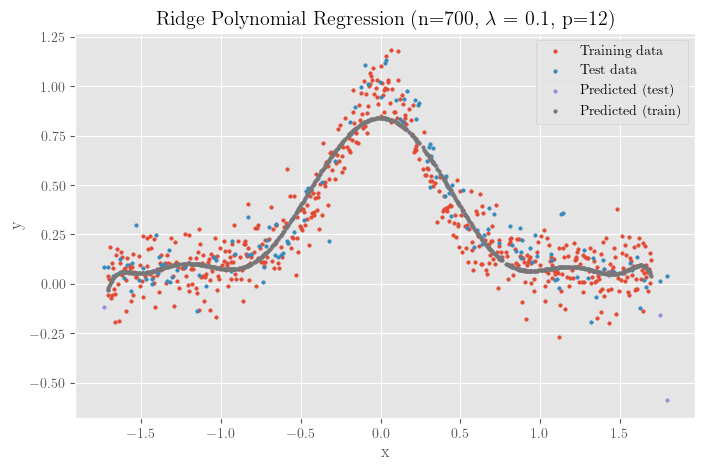

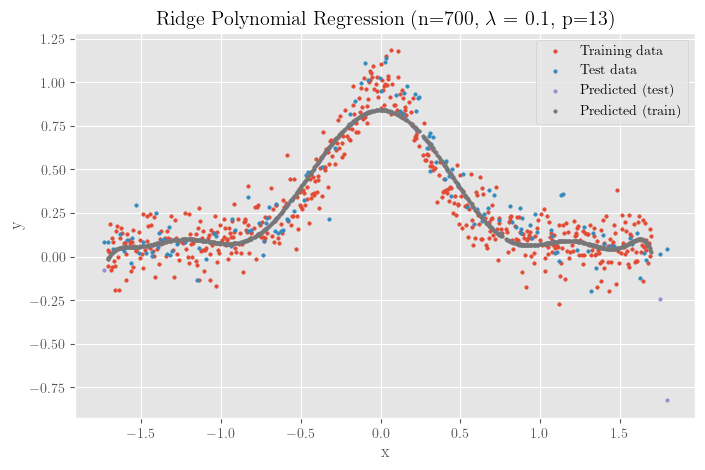

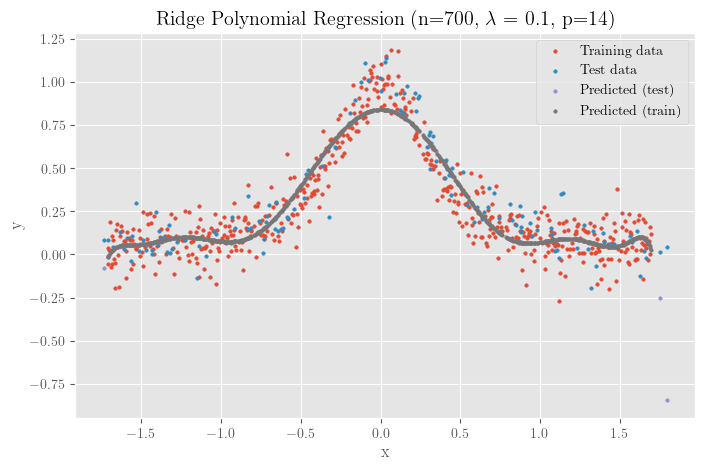

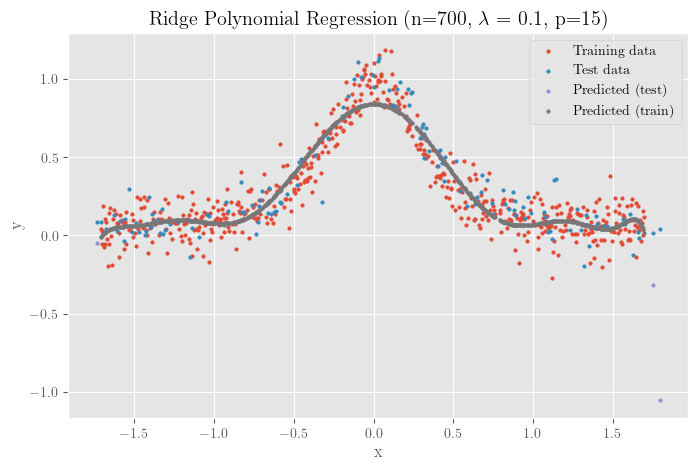

In [120]:
for p in p_vals:    
    plot_Ridge_results(df_Ridge_degs, p, n, lamb)

Text(0.5, 0.98, 'Ridge (n=700, $\\lambda$=0.1)')

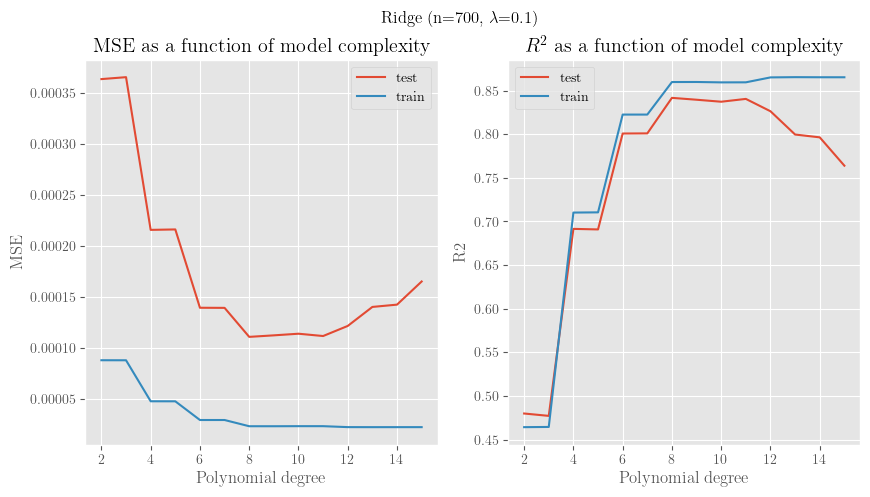

In [121]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_test'], label='test')
ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_train'], label='train')

ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_test'], label='test')
ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_train'], label='train')

ax[0].set_ylabel('MSE')
ax[1].set_ylabel('R2')

ax[0].set_title('MSE as a function of model complexity')
ax[1].set_title(r'$R^2$ as a function of model complexity')

for axs in ax:
    axs.legend()
    axs.set_xlabel('Polynomial degree')

fig.suptitle(rf'Ridge (n={n}, $\lambda$={lamb})')

For Ridge regression with $n=700$ and $\lambda = 0.1$, the best model complexity is $p=8$.

In [122]:
def Ridge_various_n_data(p, lamb, n_vals):
    """
    Performs Ordinary Least Square analysis on
    the Runge function for a given polynomial degree
    and a range of samples (data points).

    Inputs:
        p (int): Polynomial degree.
        p (np.ndarray): List of number of samples.

    Returns:
        df_Ridge (pd.DataFrame): Dataframe containing all results.
    """
    results = []

    for n in n_vals:
        # Making the data and splitting into test/train
        train, test, full = make_data(n)  # making a dataset with size n
        x_train, y_train = train  # training data
        x_test, y_test = test  # test data
        x_all, y_all, y_all_clean = full  # full data

        x_train = x_train.reshape(-1, 1)
        x_test = x_test.reshape(-1, 1)
        x_all = x_all.reshape(-1, 1)

        # Scaling the full data, the training and the test set separately
        x_train_s = my_scaler(x_train)
        x_test_s = my_scaler(x_test)
        x_all_s = my_scaler(x_all)

        
        # Making a design matrix based of the scaled data
        X_train = polynomial_features(x_train_s, p, intercept=True)
        X_test = polynomial_features(x_test_s, p, intercept=True)

        # Finding the Ridge parameters from the training data
        theta = Ridge_parameters(X_train, y_train, lamb)

        # Prediciting
        y_pred_test = X_test @ theta
        y_pred_train = X_train @ theta

        # assessing the model with scores
        mse_test = MSE(y_test, y_pred_test)
        r2_test = R2(y_test, y_pred_test)

        mse_train = MSE(y_train, y_pred_train)
        r2_train = R2(y_train, y_pred_train)
        
        # saving the results in a pandas dataframe
        results.append({
            'n': n,
            'theta': theta,
            'MSE_test': mse_test,
            'R2_test': r2_test,
            'MSE_train': mse_train,
            'R2_train': r2_train,
            'y_pred_test': y_pred_test,
            'y_pred_train': y_pred_train,
            'y_test': y_test,
            'y_train': y_train,
            'y_all': y_all,
            'x_test': x_test,
            'x_train': x_train,
            'x_all': x_all
            })

    df_Ridge = pd.DataFrame(results)

    return df_Ridge

In [123]:
p = 8
lamb = 0.1
n_vals = np.arange(10, 2000, 100)  # samples

In [132]:
df_Ridge_points = Ridge_various_n_data(p, lamb, n_vals)

Text(0, 0.5, '$R^2$')

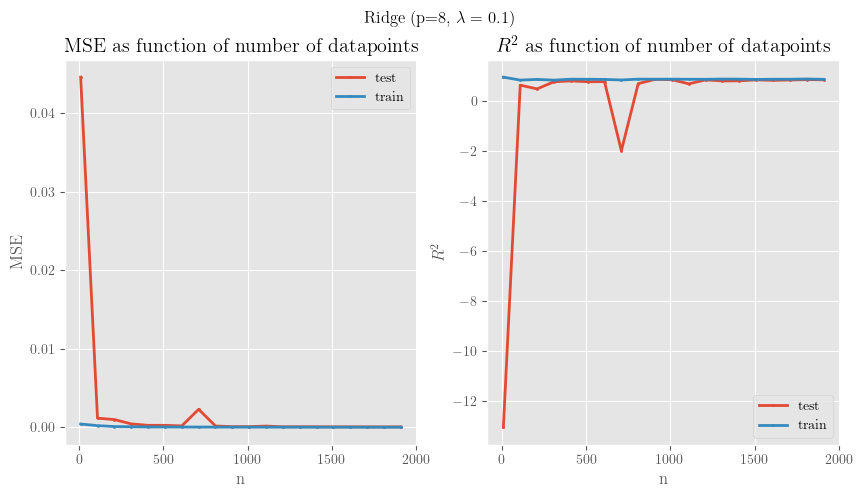

In [133]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(df_Ridge_points['n'], df_Ridge_points['MSE_test'], marker='o', markersize='1', linewidth='2', label='test')
ax[0].plot(df_Ridge_points['n'], df_Ridge_points['MSE_train'], marker='o', markersize='1', linewidth='2', label='train')

ax[1].plot(df_Ridge_points['n'], df_Ridge_points['R2_test'], marker='o', markersize='1', linewidth='2', label='test')
ax[1].plot(df_Ridge_points['n'], df_Ridge_points['R2_train'], marker='o', markersize='1', linewidth='2', label='train')

ax[0].set_title('MSE as function of number of datapoints ')
ax[1].set_title(r'$R^2$ as function of number of datapoints')

fig.suptitle(rf'Ridge (p={p}, $\lambda = $ {lamb})')

for axs in ax:
    axs.set_xlabel('n')
    axs.legend()

ax[0].set_ylabel('MSE')
ax[1].set_ylabel(r'$R^2$')

For Ridge regression with polynomial degree 8 and $\lambda = 0.1$, $n>1000$ seems sufficient. 

In [ ]:
n = 2000
p = 8
lambs = np.logspace(-10, 1, 15)

In [126]:
df_Ridge_lambs = Ridge_various_lambs(n, p, lambs)

Text(0.5, 1.05, 'Ridge (n=2000, p=8)')

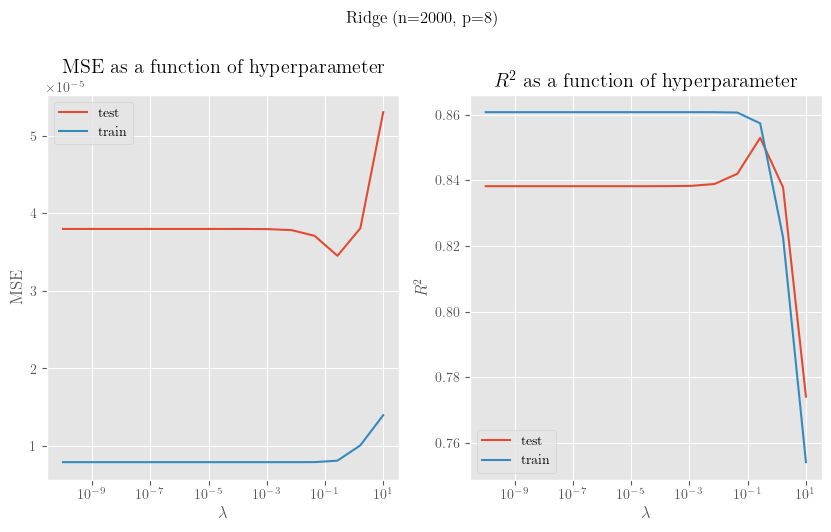

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['MSE_test'], label='test')
ax[0].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['MSE_train'], label='train')

ax[1].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['R2_test'], label='test')
ax[1].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['R2_train'], label='train')

ax[0].set_ylabel('MSE')
ax[1].set_ylabel(r'$R^2$')

ax[0].set_title('MSE as a function of hyperparameter')
ax[1].set_title(r'$R^2$ as a function of hyperparameter')

for axs in ax:
    axs.legend()
    axs.set_xlabel(r'$\lambda$')

fig.suptitle(f'Ridge (n={n}, p={p})', y=1.05)

# Comparing OLS and Ridge

Text(0.5, 0.98, 'OLS and Ridge \\\\n = 2000, $\\lambda$=0.1')

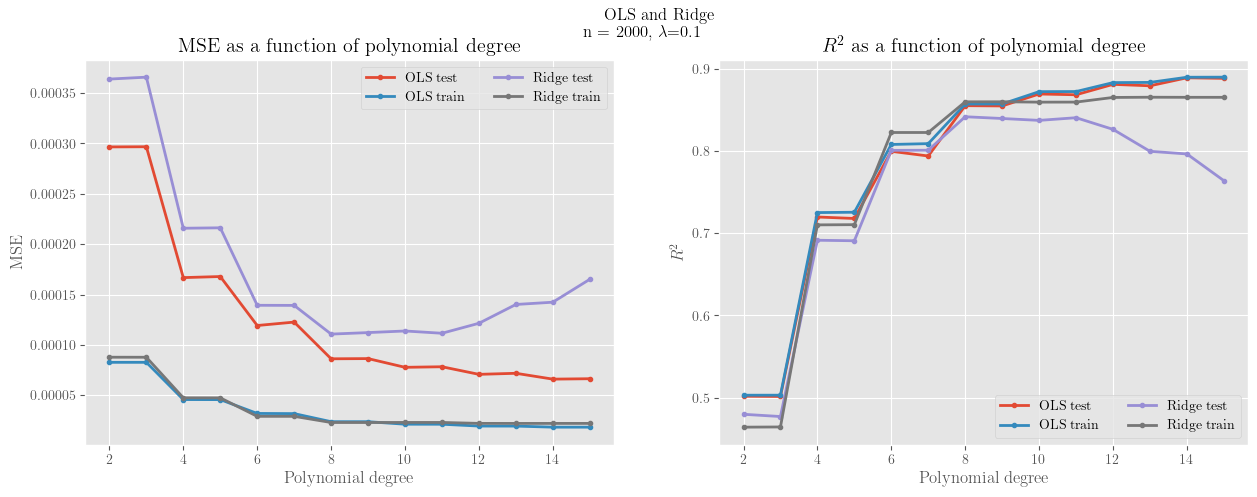

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_test'], marker='o', markersize='3', linewidth='2', label='OLS test')
ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_train'], marker='o', markersize='3', linewidth='2', label='OLS train')

ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_test'], marker='o', markersize='3', linewidth='2', label='Ridge test')
ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_train'], marker='o', markersize='3', linewidth='2', label='Ridge train')


ax[0].set_title('MSE as a function of polynomial degree')
ax[0].legend(loc='upper right', ncol=2)
ax[0].set_xlabel('Polynomial degree')
ax[0].set_ylabel('MSE')

ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_test'], marker='o', markersize='3', linewidth='2', label=f'OLS test')
ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_train'], marker='o', markersize='3', linewidth='2', label=f'OLS train')

ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_test'], marker='o', markersize='3', linewidth='2', label=f'Ridge test')
ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_train'], marker='o', markersize='3', linewidth='2', label=f'Ridge train')

ax[1].set_title(r'$R^2$ as a function of polynomial degree')
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(rf'OLS and Ridge \\n = {n}, $\lambda$={lamb}')

Text(0.5, 0.98, 'Features as a function of polynomial degree (n=2000)')

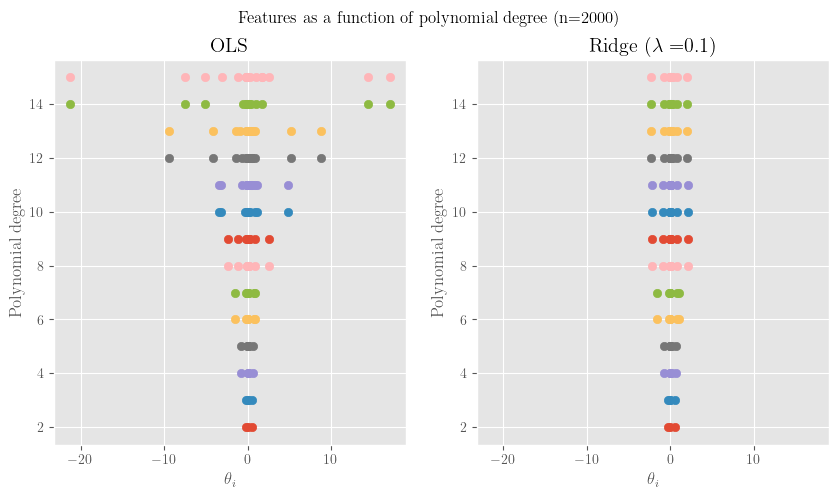

In [129]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), sharex=True)

for i,j in zip(df_OLS_degs["p"], df_OLS_degs["theta"]):
    d = np.full((i+1),fill_value=i)
    ax[0].scatter(j,d)

ax[0].set_title('OLS')

for i,j in zip(df_Ridge_degs["p"], df_Ridge_degs["theta"]):
    d = np.full((i+1),fill_value=i)
    ax[1].scatter(j,d)

ax[1].set_title(rf'Ridge ($\lambda =${lamb})')

for axs in ax:
    axs.set_xlabel(r'$\theta_i$')
    axs.set_ylabel('Polynomial degree')

fig.suptitle(f'Features as a function of polynomial degree (n={n})')

Text(0.5, 0, '$\\theta_i$')

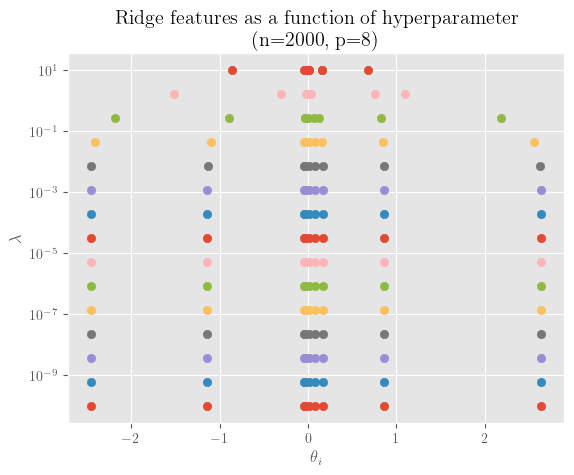

In [130]:
fig, ax = plt.subplots()

for t, l in zip(df_Ridge_lambs['theta'], df_Ridge_lambs['lambda']):
    ls = np.ones(p+1)*l
    ax.scatter(t, ls)

ax.set_yscale('log')
ax.set_title(f'Ridge features as a function of hyperparameter \n (n={n}, p={p})')

ax.set_ylabel(r'$\lambda$')
ax.set_xlabel(r'$\theta_i$')